<a href="https://colab.research.google.com/github/Meghana09G/ICP2-WEEK-2-/blob/main/ICP_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [4]:
!pip install tensorflow


In [5]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np

In [6]:

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:

# Define the model
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8814 - loss: 0.4171 - val_accuracy: 0.9592 - val_loss: 0.1340
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9674 - loss: 0.1081 - val_accuracy: 0.9702 - val_loss: 0.0985
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9784 - loss: 0.0697 - val_accuracy: 0.9695 - val_loss: 0.0936
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9834 - loss: 0.0513 - val_accuracy: 0.9733 - val_loss: 0.0882
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0395 - val_accuracy: 0.9765 - val_loss: 0.0828


In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Baseline model accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9715 - loss: 0.0973
Baseline model accuracy: 0.9765


In [10]:
# Define a more complex model
def create_complex_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the more complex model
complex_model = create_complex_model()
complex_history = complex_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8746 - loss: 0.3992 - val_accuracy: 0.9666 - val_loss: 0.1147
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9699 - loss: 0.1013 - val_accuracy: 0.9718 - val_loss: 0.0960
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - accuracy: 0.9773 - loss: 0.0742 - val_accuracy: 0.9745 - val_loss: 0.0931
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9821 - loss: 0.0571 - val_accuracy: 0.9723 - val_loss: 0.0973
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9876 - loss: 0.0421 - val_accuracy: 0.9774 - val_loss: 0.0840


In [11]:
# Evaluate the complex model
complex_loss, complex_accuracy = complex_model.evaluate(x_test, y_test)
print(f"Complex model accuracy: {complex_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9734 - loss: 0.1001
Complex model accuracy: 0.9774


In [12]:
from google.colab import files
uploaded = files.upload()

Saving Breas Cancer.csv to Breas Cancer.csv


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:

# Define the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.7766 - loss: 0.5862 - val_accuracy: 0.9649 - val_loss: 0.3200
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9467 - loss: 0.3054 - val_accuracy: 0.9649 - val_loss: 0.1786
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9416 - loss: 0.1949 - val_accuracy: 0.9649 - val_loss: 0.1214
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9463 - loss: 0.1485 - val_accuracy: 0.9737 - val_loss: 0.0957
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9749 - loss: 0.1018 - val_accuracy: 0.9737 - val_loss: 0.0835
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9799 - loss: 0.0802 - val_accuracy: 0.9737 - val_loss: 0.0763
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9752 - loss: 0.0832 - val_accuracy: 0.9649 - val_loss: 0.0722
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9893 - loss: 0.0600 - val_accuracy: 0.9649 - v

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Basic model accuracy: {accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9759 - loss: 0.0763
Basic model accuracy: 0.9737


In [17]:

# Define a more complex model
def create_complex_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the more complex model
complex_model = create_complex_model()
complex_history = complex_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8153 - loss: 0.6278 - val_accuracy: 0.9474 - val_loss: 0.4193
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9495 - loss: 0.3534 - val_accuracy: 0.9737 - val_loss: 0.1610
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9541 - loss: 0.1517 - val_accuracy: 0.9825 - val_loss: 0.0843
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9839 - loss: 0.0742 - val_accuracy: 0.9912 - val_loss: 0.0700
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9861 - loss: 0.0494 - val_accuracy: 0.9825 - val_loss: 0.0731
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9880 - loss: 0.0455 - val_accuracy: 0.9737 - val_loss: 0.0765
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9896 - loss: 0.0421 - val_accuracy: 0.9825 - val_loss: 0.0773
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9943 - loss: 0.0328 - val_accuracy: 0.9737 - val_los

In [18]:

# Evaluate the complex model
complex_loss, complex_accuracy = complex_model.evaluate(X_test, y_test)
print(f"Complex model accuracy: {complex_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9645 - loss: 0.1331
Complex model accuracy: 0.9737


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# Define the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7097 - loss: 0.6420 - val_accuracy: 0.9298 - val_loss: 0.3994
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9275 - loss: 0.3520 - val_accuracy: 0.9737 - val_loss: 0.2290
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9483 - loss: 0.2302 - val_accuracy: 0.9737 - val_loss: 0.1472
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9489 - loss: 0.1677 - val_accuracy: 0.9825 - val_loss: 0.1095
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9771 - loss: 0.1296 - val_accuracy: 0.9825 - val_loss: 0.0908
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9790 - loss: 0.0989 - val_accuracy: 0.9825 - val_loss: 0.0803
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9809 - loss: 0.0785 - val_accuracy: 0.9825 - val_loss: 0.0724
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9755 - loss: 0.0826 - val_accuracy: 0.9825 - val_loss: 0.0691

In [22]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Basic model accuracy with normalized data: {accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9701 - loss: 0.0780
Basic model accuracy with normalized data: 0.9825


In [23]:

# Define a more complex model
def create_complex_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the more complex model
complex_model = create_complex_model()
complex_history = complex_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7790 - loss: 0.5799 - val_accuracy: 0.9561 - val_loss: 0.2946
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9383 - loss: 0.2670 - val_accuracy: 0.9649 - val_loss: 0.1105
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9673 - loss: 0.1157 - val_accuracy: 0.9737 - val_loss: 0.0769
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9772 - loss: 0.0663 - val_accuracy: 0.9825 - val_loss: 0.0689
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9816 - loss: 0.0635 - val_accuracy: 0.9561 - val_loss: 0.0780
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9851 - loss: 0.0532 - val_accuracy: 0.9649 - val_loss: 0.0733
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9843 - loss: 0.0588 - val_accuracy: 0.9649 - val_loss: 0.0854
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9925 - loss: 0.0280 - val_accuracy: 0.9649 - val_l

In [24]:

# Evaluate the complex model
complex_loss, complex_accuracy = complex_model.evaluate(X_test, y_test)
print(f"Complex model accuracy with normalized data: {complex_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9558 - loss: 0.1236
Complex model accuracy with normalized data: 0.9649


In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [26]:

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [27]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8835 - loss: 0.4071 - val_accuracy: 0.9619 - val_loss: 0.1263
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9681 - loss: 0.1027 - val_accuracy: 0.9711 - val_loss: 0.0925
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9781 - loss: 0.0712 - val_accuracy: 0.9753 - val_loss: 0.0795
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9838 - loss: 0.0511 - val_accuracy: 0.9759 - val_loss: 0.0819
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9872 - loss: 0.0394 - val_accuracy: 0.9750 - val_loss: 0.0814
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.9762 - val_loss: 0.0809
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9914 - loss: 0.0248 - val_accuracy: 0.9741 - val_loss: 0.0910
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9932 - loss: 0.

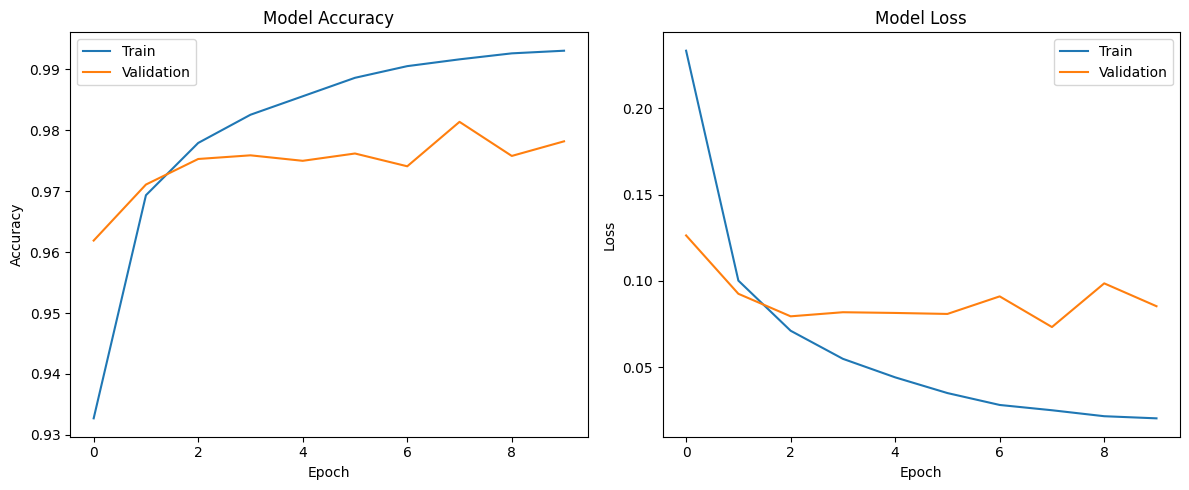

In [28]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          epochs=10,
          batch_size=32,
          validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8772 - loss: 0.4191 - val_accuracy: 0.9582 - val_loss: 0.1326
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9676 - loss: 0.1071 - val_accuracy: 0.9707 - val_loss: 0.0907
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9792 - loss: 0.0694 - val_accuracy: 0.9716 - val_loss: 0.0861
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9829 - loss: 0.0526 - val_accuracy: 0.9747 - val_loss: 0.0826
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9875 - loss: 0.0383 - val_accuracy: 0.9759 - val_loss: 0.0834
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9898 - loss: 0.0290 - val_accuracy: 0.9770 - val_loss: 0.0824
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9907 - loss: 0.0267 - val_accuracy: 0.9780 - val_loss: 0.0843
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9921 - loss: 0.

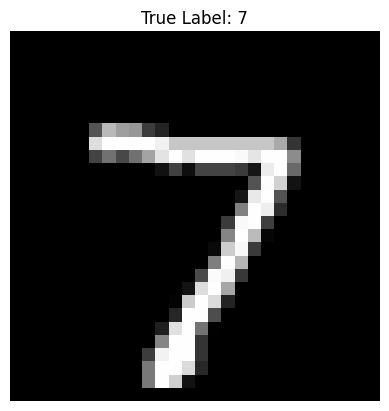

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predicted Label: 7


In [4]:
# Select an image from the test set
index = 0  # Change this index to test different images
test_image = x_test[index]
test_label = y_test[index]

# Plot the image
plt.imshow(test_image, cmap='gray')
plt.title(f'True Label: {np.argmax(test_label)}')
plt.axis('off')
plt.show()

# Reshape the image for the model
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Perform inference
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions[0])

print(f'Predicted Label: {predicted_class}')


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [6]:
def create_model_with_activation(activation_func):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation_func),
        Dense(64, activation=activation_func),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_model_with_different_layers(activation_func):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(256, activation=activation_func),
        Dense(128, activation=activation_func),
        Dense(64, activation=activation_func),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [7]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Training model with activation function: tanh
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8826 - loss: 0.4069 - val_accuracy: 0.9544 - val_loss: 0.1526
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9626 - loss: 0.1288 - val_accuracy: 0.9617 - val_loss: 0.1214
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9746 - loss: 0.0850 - val_accuracy: 0.9692 - val_loss: 0.0968
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9820 - loss: 0.0599 - val_accuracy: 0.9738 - val_loss: 0.0823
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9866 - loss: 0.0425 - val_accuracy: 0.9721 - val_loss: 0.0887
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9893 - loss: 0.0341 - val_accuracy: 0.9760 - val_loss: 0.0808
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9925 - loss: 0.0252 - val_accuracy: 0.9749 - val_loss: 0.0873
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━

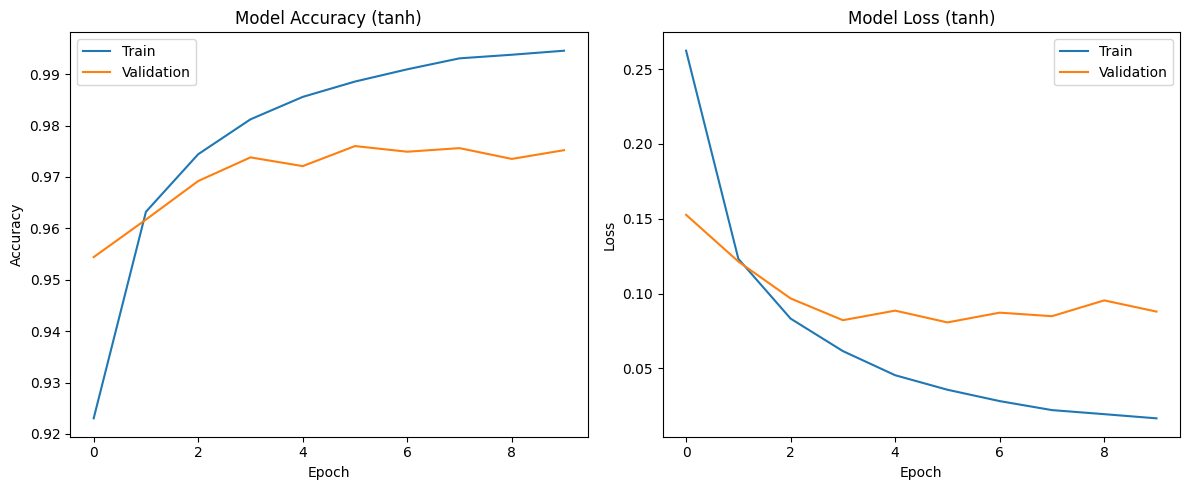

Training model with activation function: sigmoid
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7858 - loss: 0.8574 - val_accuracy: 0.9372 - val_loss: 0.2155
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9422 - loss: 0.1960 - val_accuracy: 0.9553 - val_loss: 0.1485
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9616 - loss: 0.1287 - val_accuracy: 0.9652 - val_loss: 0.1165
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9719 - loss: 0.0976 - val_accuracy: 0.9695 - val_loss: 0.1036
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9770 - loss: 0.0770 - val_accuracy: 0.9720 - val_loss: 0.0923
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9826 - loss: 0.0604 - val_accuracy: 0.9739 - val_loss: 0.0846
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9874 - loss: 0.0459 - val_accuracy: 0.9749 - val_loss: 0.0807
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━

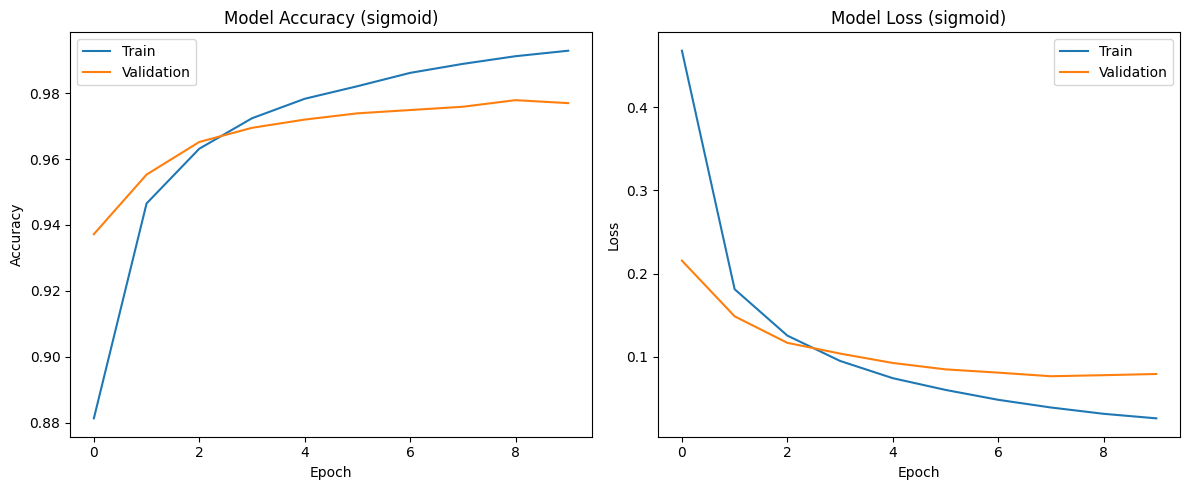

In [9]:
# Activation functions to test
activation_functions = ['tanh', 'sigmoid']

for activation in activation_functions:
    print(f"Training model with activation function: {activation}")

    # Create and train the model
    model = create_model_with_activation(activation)
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(x_test, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Model accuracy with activation {activation}: {accuracy:.4f}")

    # Plot training & validation accuracy and loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy ({activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss ({activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])

    plt.tight_layout()
    plt.show()


Training model with activation function: tanh (No Scaling)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7645 - loss: 0.7571 - val_accuracy: 0.8421 - val_loss: 0.4900
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8630 - loss: 0.4412 - val_accuracy: 0.8788 - val_loss: 0.3826
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8787 - loss: 0.3826 - val_accuracy: 0.8843 - val_loss: 0.3619
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8877 - loss: 0.3527 - val_accuracy: 0.8953 - val_loss: 0.3412
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8897 - loss: 0.3503 - val_accuracy: 0.9049 - val_loss: 0.3057
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9042 - loss: 0.3067 - val_accuracy: 0.8983 - val_loss: 0.3189
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9056 - loss: 0.3043 - val_accuracy: 0.9152 - val_loss: 0.2791
Epoch 8/10
1875/1875 ━━━

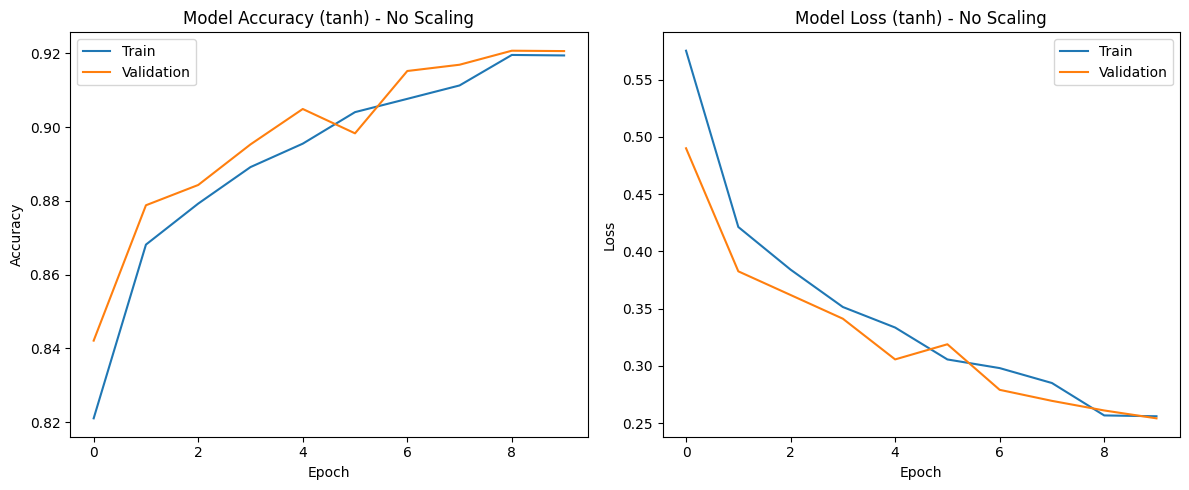

Training model with activation function: sigmoid (No Scaling)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7636 - loss: 0.9359 - val_accuracy: 0.8888 - val_loss: 0.3801
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8933 - loss: 0.3552 - val_accuracy: 0.9000 - val_loss: 0.3295
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9014 - loss: 0.3219 - val_accuracy: 0.9140 - val_loss: 0.2807
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9126 - loss: 0.2855 - val_accuracy: 0.9141 - val_loss: 0.2790
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9115 - loss: 0.2874 - val_accuracy: 0.9225 - val_loss: 0.2504
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9217 - loss: 0.2553 - val_accuracy: 0.9199 - val_loss: 0.2671
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9197 - loss: 0.2615 - val_accuracy: 0.9304 - val_loss: 0.2328
Epoch 8/10
1875/1875 ━

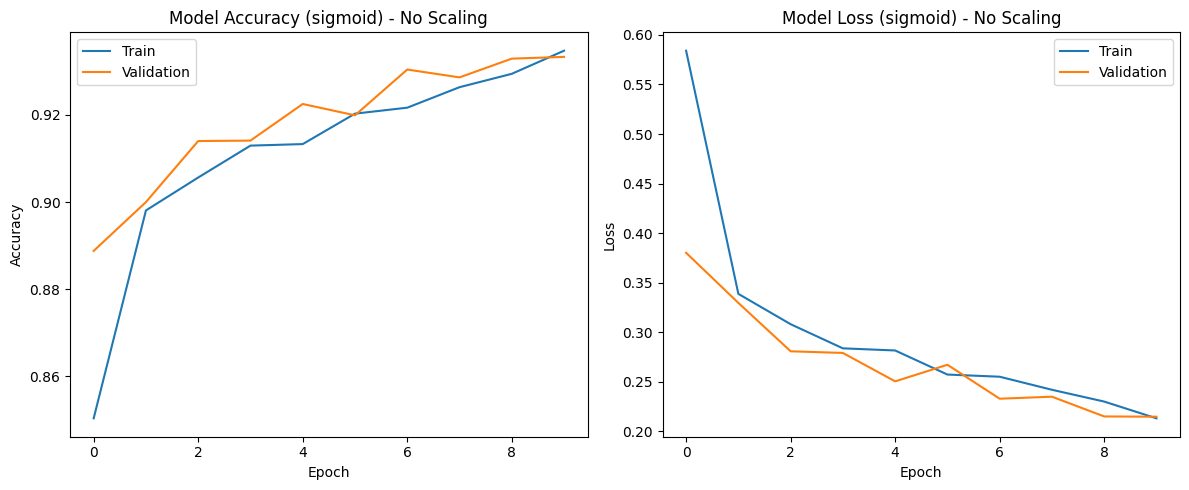

In [11]:
# Load the MNIST dataset without scaling
(x_train_no_scale, y_train_no_scale), (x_test_no_scale, y_test_no_scale) = mnist.load_data()

# One-hot encode the labels
y_train_no_scale = to_categorical(y_train_no_scale, 10)
y_test_no_scale = to_categorical(y_test_no_scale, 10)

# Train and evaluate models with no scaling and different activation functions
for activation in activation_functions:
    print(f"Training model with activation function: {activation} (No Scaling)")

    # Create and train the model
    model_no_scale = create_model_with_activation(activation)
    history_no_scale = model_no_scale.fit(x_train_no_scale, y_train_no_scale,
                                          epochs=10,
                                          batch_size=32,
                                          validation_data=(x_test_no_scale, y_test_no_scale))

    # Evaluate the model
    loss_no_scale, accuracy_no_scale = model_no_scale.evaluate(x_test_no_scale, y_test_no_scale)
    print(f"Model accuracy with activation {activation} (No Scaling): {accuracy_no_scale:.4f}")

    # Plot training & validation accuracy and loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history_no_scale.history['accuracy'])
    plt.plot(history_no_scale.history['val_accuracy'])
    plt.title(f'Model Accuracy ({activation}) - No Scaling')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
    plt.subplot(1, 2, 2)
    plt.plot(history_no_scale.history['loss'])
    plt.plot(history_no_scale.history['val_loss'])
    plt.title(f'Model Loss ({activation}) - No Scaling')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])

    plt.tight_layout()
    plt.show()